In [7]:
import snscrape.modules.twitter as sntwitter
import pandas as pd 
import itertools
from tqdm.notebook import tqdm

import nltk
from nltk.tokenize import word_tokenize
from nltk.text import Text

#import spacy

import re
import string

import matplotlib.pyplot as plt

from PIL import Image
import numpy as np

from textblob import TextBlob
from wordcloud import WordCloud, STOPWORDS

from nltk.corpus import stopwords

In [8]:
df = pd.read_csv("todes2.csv")

In [13]:
df['date_'] = pd.to_datetime(df['pubdate'], errors='coerce')


In [14]:
df['date'] = df["date_"].dt.date
df["time"] = df["date_"].dt.time


In [15]:
df=df[['date', 'time', 'username', 'text', 'retweets', 'likes', 'quotes', 'permalink', 'pubdate']]
df.drop(['pubdate'],axis = 1, inplace = True)

/usr/local/Caskroom/miniconda/base/envs/ironhack_env/lib/python3.9/site-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [17]:
df

,date,time,username,text,retweets,likes,quotes,permalink
0,2021-07-23,08:56:23,maltipo,"¿Porqué es tendencia un tipo machista, artero,...",0,0,0,https://twitter.com/maltipo/status/14184951933...
1,2021-07-23,05:18:17,KarolCarriola,@Phoenix47941301 @ElisaLoncon @Jaime_Bassa @UE...,0,0,0,https://twitter.com/KarolCarriola/status/14184...
2,2021-07-23,04:47:19,josekun0,"@bloda_d Con solo escuchar a alguien decir ""to...",0,1,0,https://twitter.com/josekun0/status/1418432514...
3,2021-07-23,04:29:08,Romaure1,"@PrensaConvenci1 ""Todes"" No existe esa palabr...",0,11,0,https://twitter.com/Romaure1/status/1418427941...
4,2021-07-23,04:28:28,jcff143,@isidoraMaher Siguen dando jugo jugué y juga t...,0,0,0,https://twitter.com/jcff143/status/14184277734...
...,...,...,...,...,...,...,...,...
4533,2014-04-13,01:38:27,caarlosebastian,"Hasta pronto Stgo. Gracias a mis amiges, a mi ...",0,0,0,https://twitter.com/caarlosebastian/status/455...
4534,2014-04-02,02:29:15,alelitz,Igual tener amigos y familia repartidos por to...,0,0,0,https://twitter.com/alelitz/status/45118455452...
4535,2014-01-07,03:45:01,SpikeperezG,"""@latemporera: ¿Todes se han culiado a alguien...",0,0,0,https://twitter.com/SpikeperezG/status/4204006...
4536,2013-10-11,11:48:50,diesmori,"@CONI_NONSTOP hagamos una secta? con weed, nud...",0,1,0,https://twitter.com/diesmori/status/3886322801...


In [31]:
df.to_csv("todesnotclean")

In [18]:
# to remove the hyperlink from the data
df['text'] = df['text'].map(lambda x: re.sub(r'https?:\/\/\S+','',x))
# TO REMOVE THE TEXT PRESENTS AFTER @
df['text'] = df['text'].map(lambda x: re.sub(r"@[A-Za-z0-9]+","", x))
# to remove the retweet names which pressents after _
df['text'] = df['text'].map(lambda x: re.sub(r"_[A-Za-z0-9]+","", x))
df['text'] = df['text'].map(lambda x: re.sub("[RT]","", x))
# getting the text into lowercase
df['text'] = df['text'].str.lower()
# removing the speacial characters
df['text'] = df['text'].map(lambda x: re.sub('\[.*?\]',' ', x))
#to remove hashtag and other special characters
df['text'] = df['text'].map(lambda x: re.sub('[%s]' % re.escape(string.punctuation),' ', x))
# to remove the numbers
df['text'] = df['text'].map(lambda x: re.sub('\w*\d\w*',' ', x))
# to remove empty ''""
df['text'] = df['text'].map(lambda x: re.sub('[''""]',' ', x))
# removing '\n'
df['text'] = df['text'].map(lambda x: re.sub('\n',' ', x))

<ipython-input-18-50bf6d27c99a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['text'] = df['text'].map(lambda x: re.sub(r'https?:\/\/\S+','',x))
<ipython-input-18-50bf6d27c99a>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['text'] = df['text'].map(lambda x: re.sub(r"@[A-Za-z0-9]+","", x))
<ipython-input-18-50bf6d27c99a>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the doc

In [53]:
df

,date,time,username,text,retweets,likes,quotes,permalink,tokenized_text
0,2021-07-23,08:56:23,maltipo,¿porqué es tendencia un tipo machista artero ...,0,0,0,https://twitter.com/maltipo/status/14184951933...,"[¿porqué, es, tendencia, un, tipo, machista, a..."
1,2021-07-23,05:18:17,KarolCarriola,si por todes les chilenes jejejee,0,0,0,https://twitter.com/KarolCarriola/status/14184...,"[si, por, todes, les, chilenes, jejejee]"
2,2021-07-23,04:47:19,josekun0,con solo escuchar a alguien decir todes ya ...,0,1,0,https://twitter.com/josekun0/status/1418432514...,"[con, solo, escuchar, a, alguien, decir, todes..."
3,2021-07-23,04:29:08,Romaure1,odes no existe esa palabra cual es el afán...,0,11,0,https://twitter.com/Romaure1/status/1418427941...,"[odes, no, existe, esa, palabra, cual, es, el,..."
4,2021-07-23,04:28:28,jcff143,siguen dando jugo jugué y juga todos todas y...,0,0,0,https://twitter.com/jcff143/status/14184277734...,"[siguen, dando, jugo, jugué, y, juga, todos, t..."
...,...,...,...,...,...,...,...,...,...
4533,2014-04-13,01:38:27,caarlosebastian,hasta pronto stgo gracias a mis amiges a mi ...,0,0,0,https://twitter.com/caarlosebastian/status/455...,"[hasta, pronto, stgo, gracias, a, mis, amiges,..."
4534,2014-04-02,02:29:15,alelitz,igual tener amigos y familia repartidos por to...,0,0,0,https://twitter.com/alelitz/status/45118455452...,"[igual, tener, amigos, y, familia, repartidos,..."
4535,2014-01-07,03:45:01,SpikeperezG,¿odes se han culiado a alguien de tuiter ...,0,0,0,https://twitter.com/SpikeperezG/status/4204006...,"[¿odes, se, han, culiado, a, alguien, de, tuit..."
4536,2013-10-11,11:48:50,diesmori,hagamos una secta con weed nudismo y buena ...,0,1,0,https://twitter.com/diesmori/status/3886322801...,"[hagamos, una, secta, con, weed, nudismo, y, b..."


In [19]:
text = '😎🚀🧑\u200d🚀☄️ ⬇️ ✊ ⏰💊🍆🤡🤷🏼😀👽🦁🌚🤣🎧🔵💻💰👌✨💸❤️📣🤣😂👊🏼⚖️🔥🚽🤘😭🩸➡️'
def remove_emoji(text):
    emoji_pattern = re.compile('[\U00010000-\U0010ffff]', flags=re.UNICODE)
    return re.sub(emoji_pattern, "",text)

In [20]:
df['text'] = df['text'].apply(remove_emoji)

<ipython-input-20-21fbb897fd9d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['text'] = df['text'].apply(remove_emoji)


In [49]:
df['tokenized_text'] = df['text'].apply(word_tokenize) 

<ipython-input-49-d691ca238bd4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['tokenized_text'] = df['text'].apply(word_tokenize)


In [24]:
from nltk.corpus import stopwords

In [25]:
stop_words = stopwords.words('spanish')

In [26]:
df['text_2'] = df['text'].apply(lambda x: [item for item in x if item not in stop_words])

In [64]:
from sentiment_analysis_spanish import sentiment_analysis


In [27]:
string1 = ""
for indice, texto in df["text"].iteritems():
    string1 = string1 + texto + " "

In [28]:
string1_text = Text(string1)

In [29]:
l = [' '.join(df['text'])]

In [30]:
string1_text=Text(l)

In [32]:
print(string1_text)

<Text: ¿porqué es tendencia un tipo machista  artero  simplón  que desprecia todo lo que no entra en su limitada visión  pasado a poto y que juntos a los otros cochinos  están arruinando para todes uno de los clásicos del cine      si por todes les chilenes jejejee  con solo escuchar a alguien decir  todes  ya no merece mi respeto xd   odes   no existe esa palabra cual es el afán de escribirla y pronunciarla       ‍♀️‍♀️‍♀️‍♀️‍♀️  siguen dando jugo jugué y juga todos  todas y todes   cuanta preocupación por el todes  iene el presidente de argentina  alberto fernández preocúpese y ocúpese  por los argentinos que la están pasando muy mal  deje que cada quien haga con su trasero lo que le dé la gana mientras no moleste a los demás  lamentablemente solo eres dueño de tu opinión  nada más  chile es de todes  no solo de los que piensan como uno  esto no se trata de venganza el nuevo chile será de las cubillos y de las loncon  que el discurso sea de unidad y no de odio  ignorar a alguien que 

In [34]:
import docx2txt

In [35]:
textfile=docx2txt.process("todes_twitts_text.docx")

In [36]:
textfile

'¿porqué es tendencia un tipo machista  artero  simplón  que desprecia todo lo que no entra en su limitada visión  pasado a poto y que juntos a los otros cochinos  están arruinando para todes uno de los clásicos del cine      si por todes les chilenes jejejee  con solo escuchar a alguien decir  todes  ya no merece mi respeto xd   odes   no existe esa palabra cual es el afán de escribirla y pronunciarla       \u200d♀️\u200d♀️\u200d♀️\u200d♀️\u200d♀️  siguen dando jugo jugué y juga todos  todas y todes   cuanta preocupación por el todes  iene el presidente de argentina  alberto fernández preocúpese y ocúpese  por los argentinos que la están pasando muy mal  deje que cada quien haga con su trasero lo que le dé la gana mientras no moleste a los demás  lamentablemente solo eres dueño de tu opinión  nada más  chile es de todes  no solo de los que piensan como uno  esto no se trata de venganza el nuevo chile será de las cubillos y de las loncon  que el discurso sea de unidad y no de odio  ign

In [37]:
tokens=word_tokenize(textfile)

In [38]:
len(tokens)

94978

In [39]:
fdist1=nltk.FreqDist(tokens)

In [40]:
word_freq= dict((word,freq) for word, freq in fdist1.items() if not word.isdigit())

In [41]:
sorted=sorted(word_freq.items(), key=lambda x:x[1], reverse=True)

In [42]:
sorted

[('todes', 3807),
 ('de', 3481),
 ('y', 3251),
 ('a', 2994),
 ('que', 2845),
 ('la', 2390),
 ('en', 1874),
 ('el', 1809),
 ('para', 1582),
 ('no', 1310),
 ('por', 1060),
 ('es', 1028),
 ('los', 1002),
 ('un', 967),
 ('con', 864),
 ('odes', 791),
 ('se', 774),
 ('las', 605),
 ('una', 579),
 ('lo', 568),
 ('me', 518),
 ('todos', 512),
 ('del', 485),
 ('todas', 441),
 ('les', 410),
 ('como', 394),
 ('pero', 387),
 ('nos', 386),
 ('chile', 376),
 ('más', 374),
 ('día', 345),
 ('si', 344),
 ('al', 342),
 ('este', 325),
 ('mi', 315),
 ('buen', 291),
 ('hoy', 264),
 ('o', 258),
 ('su', 250),
 ('q', 238),
 ('ya', 229),
 ('gracias', 223),
 ('feliz', 222),
 ('“', 213),
 ('esta', 210),
 ('son', 207),
 ('yo', 204),
 ('todo', 203),
 ('”', 203),
 ('hay', 199),
 ('porque', 197),
 ('días', 191),
 ('le', 176),
 ('semana', 175),
 ('ser', 170),
 ('buenos', 164),
 ('eso', 160),
 ('santiago', 160),
 ('muy', 158),
 ('sus', 158),
 ('ahora', 147),
 ('e', 146),
 ('estamos', 143),
 ('así', 142),
 ('te', 142),
 

In [43]:
from nltk.corpus import stopwords
stop_words= stopwords.words('spanish')

In [44]:
print(stop_words)

['de', 'la', 'que', 'el', 'en', 'y', 'a', 'los', 'del', 'se', 'las', 'por', 'un', 'para', 'con', 'no', 'una', 'su', 'al', 'lo', 'como', 'más', 'pero', 'sus', 'le', 'ya', 'o', 'este', 'sí', 'porque', 'esta', 'entre', 'cuando', 'muy', 'sin', 'sobre', 'también', 'me', 'hasta', 'hay', 'donde', 'quien', 'desde', 'todo', 'nos', 'durante', 'todos', 'uno', 'les', 'ni', 'contra', 'otros', 'ese', 'eso', 'ante', 'ellos', 'e', 'esto', 'mí', 'antes', 'algunos', 'qué', 'unos', 'yo', 'otro', 'otras', 'otra', 'él', 'tanto', 'esa', 'estos', 'mucho', 'quienes', 'nada', 'muchos', 'cual', 'poco', 'ella', 'estar', 'estas', 'algunas', 'algo', 'nosotros', 'mi', 'mis', 'tú', 'te', 'ti', 'tu', 'tus', 'ellas', 'nosotras', 'vosotros', 'vosotras', 'os', 'mío', 'mía', 'míos', 'mías', 'tuyo', 'tuya', 'tuyos', 'tuyas', 'suyo', 'suya', 'suyos', 'suyas', 'nuestro', 'nuestra', 'nuestros', 'nuestras', 'vuestro', 'vuestra', 'vuestros', 'vuestras', 'esos', 'esas', 'estoy', 'estás', 'está', 'estamos', 'estáis', 'están', 'e

In [45]:
clean_words=[word for word in tokens if word.isalpha()]

In [46]:
lower_words=[word.lower() for word in clean_words]

In [47]:
words_without_stop = [word for word in lower_words if not word in stop_words]

In [51]:
fdist2=nltk.FreqDist(words_without_stop)

In [52]:
fdist2

FreqDist({'todes': 3807, 'odes': 791, 'todas': 441, 'chile': 376, 'día': 345, 'si': 344, 'buen': 291, 'hoy': 264, 'q': 238, 'gracias': 223, ...})

In [53]:
fdist2.most_common(20)

[('todes', 3807),
 ('odes', 791),
 ('todas', 441),
 ('chile', 376),
 ('día', 345),
 ('si', 344),
 ('buen', 291),
 ('hoy', 264),
 ('q', 238),
 ('gracias', 223),
 ('feliz', 222),
 ('días', 191),
 ('semana', 175),
 ('ser', 170),
 ('buenos', 164),
 ('santiago', 160),
 ('ahora', 147),
 ('así', 142),
 ('bien', 130),
 ('vamos', 130)]

In [54]:
text_list=Text(words_without_stop)

In [55]:
print(text_list.collocations())

buenos días; todas todes; pacos pacos; buen día; santiago chile;
buenas noches; besatónpromatriminioigualitario besopolítico; elepizza
pza; besopolítico elepizza; pza italia; italia besamos; lenguaje
inclusivo; apoyo visibilidadrans; nueva constitución; algunxs apoyo;
metropolitan egion; buena semana; todes todes; tener identidad; odos
odas


In [56]:
text_list.concordance("todes")

Displaying 25 of 3807 matches:
sado poto juntos cochinos arruinando todes clásicos cine si todes chilenes jeje
os arruinando todes clásicos cine si todes chilenes jejejee solo escuchar algui
 jejejee solo escuchar alguien decir todes merece respeto xd odes existe palabr
a siguen dando jugo jugué juga todas todes cuanta preocupación todes iene presi
juga todas todes cuanta preocupación todes iene presidente argentina alberto fe
ntablemente solo dueño opinión chile todes solo piensan trata venganza nuevo ch
 constitución chile íntegro fraterno todes parece todas todes piensan jeje mism
 íntegro fraterno todes parece todas todes piensan jeje mismo ocurre zurdos mis
ga cocinar detesto cocina dni frente todes coman verso kumpas retirarme aposent
 dylan odes esperamos si adiós jajaj todes niñes deben ser adoctrinados primari
sí fin comunistas qls mas si hacemos todes anuncio importante mañana odes wtf d
n participar constitución escribimos todes todes csm todes hola abigail abi aqu
icipar co

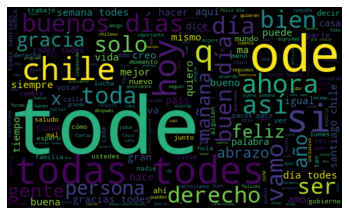

In [57]:
allwords = ' '.join([twee for twee in text_list])
wordcloud = WordCloud(width = 500, height = 300, random_state = 21, max_font_size = 119).generate(allwords)
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.show()

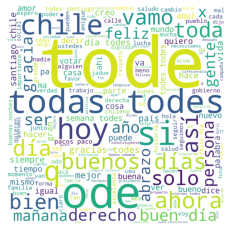

In [65]:
allwords = ' '.join([twee for twee in text_list])
twitter_mask = np.array(Image.open('twitter_logo.png'))
wordcloud = WordCloud(width=1000, height=1000,background_color = 'white',mask=twitter_mask,stopwords = STOPWORDS).generate(allwords)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [66]:
from sentiment_analysis_spanish import sentiment_analysis

In [77]:
sentiment = sentiment_analysis.SentimentAnalysisSpanish()


In [78]:
def sentiment_func(x):
    sentiment = sentiment_analysis.SentimentAnalysisSpanish()
    return sentiment.sentiment(x) 

In [83]:
t0 = time.time()
sentiment_func('te ves muy bien')
t1 = time.time() - t0

In [84]:
t1

12.53490400314331

In [80]:
import time

In [ ]:
df["sentiment"] = df["text"].apply(lambda x: sentiment_func(x))

In [86]:
t0 = time.time()
df["text"][:5].apply(lambda x: sentiment_func(x))
t1 = time.time() - t0

In [87]:
t1

73.09696793556213

In [92]:
df_728 = df[:728]

In [93]:
df_728["sentiment"] = df_728["text"].apply(lambda x: sentiment_func(x))

/usr/local/Caskroom/miniconda/base/envs/ironhack_env/lib/python3.9/site-packages/sklearn/base.py:310: UserWarning: Trying to unpickle estimator CountVectorizer from version 0.23.2 when using version 0.24.2. This might lead to breaking code or invalid results. Use at your own risk.
  warnings.warn(
/usr/local/Caskroom/miniconda/base/envs/ironhack_env/lib/python3.9/site-packages/sklearn/base.py:310: UserWarning: Trying to unpickle estimator MultinomialNB from version 0.23.2 when using version 0.24.2. This might lead to breaking code or invalid results. Use at your own risk.
  warnings.warn(
<ipython-input-93-6cee30309a4e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_728["sentiment"] = df_728["text"].apply(lambda x: sentiment_func(x))


In [94]:
df_728

,date,time,username,text,retweets,likes,quotes,permalink,text_2,sentiment
0,2021-07-23,08:56:23,maltipo,¿porqué es tendencia un tipo machista artero ...,0,0,0,https://twitter.com/maltipo/status/14184951933...,"[¿, p, r, q, u, é, , s, , t, n, d, n, c, i, ...",1.729525e-06
1,2021-07-23,05:18:17,KarolCarriola,si por todes les chilenes jejejee,0,0,0,https://twitter.com/KarolCarriola/status/14184...,"[ , , , , s, i, , p, r, , t, d, s, , l, ...",4.544694e-02
2,2021-07-23,04:47:19,josekun0,con solo escuchar a alguien decir todes ya ...,0,1,0,https://twitter.com/josekun0/status/1418432514...,"[ , c, n, , s, l, , s, c, u, c, h, r, , , ...",1.215559e-05
3,2021-07-23,04:29:08,Romaure1,odes no existe esa palabra cual es el afán...,0,11,0,https://twitter.com/Romaure1/status/1418427941...,"[ , , d, s, , , , n, , x, i, s, t, , s, ...",9.829879e-03
4,2021-07-23,04:28:28,jcff143,siguen dando jugo jugué y juga todos todas y...,0,0,0,https://twitter.com/jcff143/status/14184277734...,"[ , s, i, g, u, n, , d, n, d, , j, u, g, , ...",4.910604e-01
...,...,...,...,...,...,...,...,...,...,...
723,2021-07-04,19:32:55,besoainflip,que maravilla presidenta convencionconstituc...,0,3,0,https://twitter.com/besoainflip/status/1411770...,"[q, u, , m, r, v, i, l, l, , , p, r, s, i, ...",5.301021e-03
724,2021-07-04,19:31:26,PedrerosRicky,un chile mejor y para todes,0,1,0,https://twitter.com/PedrerosRicky/status/14117...,"[u, n, , c, h, i, l, , , m, j, r, , , p, ...",5.650961e-01
725,2021-07-04,15:32:32,YeinHippy,quiero que se entienda que la única razón por ...,0,0,0,https://twitter.com/YeinHippy/status/141170951...,"[q, u, i, r, , q, u, , s, , n, t, i, n, d, ...",2.963933e-13
726,2021-07-04,14:18:50,maluespa,alegría hoy se abren infinitas oportunidades p...,0,1,0,https://twitter.com/maluespa/status/1411690973...,"[l, g, r, í, , h, , s, , b, r, n, , i, n, ...",3.702865e-04


In [95]:
df_80

,date,time,username,text,retweets,likes,quotes,permalink,text_2,sentiment
0,2021-07-23,08:56:23,maltipo,¿porqué es tendencia un tipo machista artero ...,0,0,0,https://twitter.com/maltipo/status/14184951933...,"[¿, p, r, q, u, é, , s, , t, n, d, n, c, i, ...",0.000002
1,2021-07-23,05:18:17,KarolCarriola,si por todes les chilenes jejejee,0,0,0,https://twitter.com/KarolCarriola/status/14184...,"[ , , , , s, i, , p, r, , t, d, s, , l, ...",0.045447
2,2021-07-23,04:47:19,josekun0,con solo escuchar a alguien decir todes ya ...,0,1,0,https://twitter.com/josekun0/status/1418432514...,"[ , c, n, , s, l, , s, c, u, c, h, r, , , ...",0.000012
3,2021-07-23,04:29:08,Romaure1,odes no existe esa palabra cual es el afán...,0,11,0,https://twitter.com/Romaure1/status/1418427941...,"[ , , d, s, , , , n, , x, i, s, t, , s, ...",0.009830
4,2021-07-23,04:28:28,jcff143,siguen dando jugo jugué y juga todos todas y...,0,0,0,https://twitter.com/jcff143/status/14184277734...,"[ , s, i, g, u, n, , d, n, d, , j, u, g, , ...",0.491060
...,...,...,...,...,...,...,...,...,...,...
75,2021-07-22,13:33:54,danielheinrichm,odo bien hasta el “todes” para una abogada ...,0,1,2,https://twitter.com/danielheinrichm/status/141...,"[ , , d, , b, i, n, , h, s, t, , l, , “, ...",0.135231
76,2021-07-22,13:25:58,EmilioGarciaCel,a todos todas y todes los constituyentes no...,0,0,0,https://twitter.com/EmilioGarciaCel/status/141...,"[ , , t, d, s, , , t, d, s, , , t, d, s, ...",0.000135
77,2021-07-22,13:21:43,inoxidable_2,a qué chilenos te refieres con “todes” me d...,0,1,0,https://twitter.com/inoxidable_2/status/141819...,"[ , , , , q, u, é, , c, h, i, l, n, s, , ...",0.001422
78,2021-07-22,13:11:49,LaFranFigueroa,buen día para todes…☀️ mucho ánimo en este jue...,0,2,0,https://twitter.com/LaFranFigueroa/status/1418...,"[b, u, n, , d, í, , p, r, , t, d, s, …, ☀, ...",0.338744


In [96]:
df_marzo2020 = df[2004:2175]

In [97]:
df_marzo2020["sentiment"] = df_marzo2020["text"].apply(lambda x: sentiment_func(x))

/usr/local/Caskroom/miniconda/base/envs/ironhack_env/lib/python3.9/site-packages/sklearn/base.py:310: UserWarning: Trying to unpickle estimator CountVectorizer from version 0.23.2 when using version 0.24.2. This might lead to breaking code or invalid results. Use at your own risk.
  warnings.warn(
/usr/local/Caskroom/miniconda/base/envs/ironhack_env/lib/python3.9/site-packages/sklearn/base.py:310: UserWarning: Trying to unpickle estimator MultinomialNB from version 0.23.2 when using version 0.24.2. This might lead to breaking code or invalid results. Use at your own risk.
  warnings.warn(
<ipython-input-97-c8337da9eede>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_marzo2020["sentiment"] = df_marzo2020["text"].apply(lambda x: sentiment_func

In [111]:
df_beg = df[4000:]

In [112]:
df_beg["sentiment"] = df_beg["text"].apply(lambda x: sentiment_func(x))

<ipython-input-112-920ddda85fa5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_beg["sentiment"] = df_beg["text"].apply(lambda x: sentiment_func(x))


In [99]:
df_marzo2020

,date,time,username,text,retweets,likes,quotes,permalink,text_2,sentiment
2004,2020-03-31,22:07:44,1abiel,que onda todes jugando animal cruising porq...,0,0,0,https://twitter.com/1abiel/status/124511055588...,"[q, u, , n, d, , t, d, s, , j, u, g, n, d, ...",2.359989e-02
2005,2020-03-31,22:02:09,Vignia,odo el rato ot sea odes hablamos como ella ...,0,0,0,https://twitter.com/Vignia/status/124510915091...,"[ , d, , l, , r, t, , , t, , s, , , d, ...",1.438111e-07
2006,2020-03-31,14:07:03,flipao_,que sea un buen día para todes,0,0,0,https://twitter.com/flipao_/status/12449895910...,"[q, u, , s, , u, n, , b, u, n, , d, í, , ...",4.313843e-01
2007,2020-03-30,23:59:52,fmilagrosreal,estamos todes asi,0,2,0,https://twitter.com/fmilagrosreal/status/12447...,"[s, t, m, s, , t, d, s, , s, i, ]",1.731709e-01
2008,2020-03-30,19:03:47,DN_ediciones,gracias de antemano a todes por su apañe ❤️ án...,3,2,0,https://twitter.com/DN_ediciones/status/124470...,"[g, r, c, i, s, , d, , n, t, m, n, , , t, ...",1.460598e-01
...,...,...,...,...,...,...,...,...,...,...
2170,2020-03-02,12:04:50,JotapeMilic,el almorzamos en familia y me quedo con mate...,0,3,0,https://twitter.com/JotapeMilic/status/1234449...,"[l, , , , l, m, r, z, m, s, , n, , f, m, ...",2.636634e-01
2171,2020-03-01,16:50:19,enrique_sexto,ah fíjate pues niña que todes estén equivo...,0,0,0,https://twitter.com/enrique_sexto/status/12341...,"[h, , , , , , f, í, j, t, , p, u, s, , ...",5.963714e-05
2172,2020-03-01,15:16:12,JoseHumbertoCas,y mañana se vuelve a la realidad laboral fe...,0,0,0,https://twitter.com/JoseHumbertoCas/status/123...,"[ , m, ñ, n, , s, , v, u, l, v, , , l, , ...",6.991460e-02
2173,2020-03-01,14:20:13,loraxcat,excelenteee a todes nos viene bien informac...,0,1,0,https://twitter.com/loraxcat/status/1234121267...,"[ , x, c, l, n, t, , , , , t, d, s, , n, ...",7.225277e-02


In [106]:
def classifier(x):
    if x < 0.3:
        return "negative"
        
    elif x > 0.7:
        return "positive"
    
    else:
        return "neutral"

In [107]:
df_marzo2020["sentiment classification"] = df_marzo2020["sentiment"].apply(lambda x: classifier(x))

<ipython-input-107-eca721a88429>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_marzo2020["sentiment classification"] = df_marzo2020["sentiment"].apply(lambda x: classifier(x))


In [108]:
df_marzo2020

,date,time,username,text,retweets,likes,quotes,permalink,text_2,sentiment,sentiment classification
2004,2020-03-31,22:07:44,1abiel,que onda todes jugando animal cruising porq...,0,0,0,https://twitter.com/1abiel/status/124511055588...,"[q, u, , n, d, , t, d, s, , j, u, g, n, d, ...",2.359989e-02,negative
2005,2020-03-31,22:02:09,Vignia,odo el rato ot sea odes hablamos como ella ...,0,0,0,https://twitter.com/Vignia/status/124510915091...,"[ , d, , l, , r, t, , , t, , s, , , d, ...",1.438111e-07,negative
2006,2020-03-31,14:07:03,flipao_,que sea un buen día para todes,0,0,0,https://twitter.com/flipao_/status/12449895910...,"[q, u, , s, , u, n, , b, u, n, , d, í, , ...",4.313843e-01,neutral
2007,2020-03-30,23:59:52,fmilagrosreal,estamos todes asi,0,2,0,https://twitter.com/fmilagrosreal/status/12447...,"[s, t, m, s, , t, d, s, , s, i, ]",1.731709e-01,negative
2008,2020-03-30,19:03:47,DN_ediciones,gracias de antemano a todes por su apañe ❤️ án...,3,2,0,https://twitter.com/DN_ediciones/status/124470...,"[g, r, c, i, s, , d, , n, t, m, n, , , t, ...",1.460598e-01,negative
...,...,...,...,...,...,...,...,...,...,...,...
2170,2020-03-02,12:04:50,JotapeMilic,el almorzamos en familia y me quedo con mate...,0,3,0,https://twitter.com/JotapeMilic/status/1234449...,"[l, , , , l, m, r, z, m, s, , n, , f, m, ...",2.636634e-01,negative
2171,2020-03-01,16:50:19,enrique_sexto,ah fíjate pues niña que todes estén equivo...,0,0,0,https://twitter.com/enrique_sexto/status/12341...,"[h, , , , , , f, í, j, t, , p, u, s, , ...",5.963714e-05,negative
2172,2020-03-01,15:16:12,JoseHumbertoCas,y mañana se vuelve a la realidad laboral fe...,0,0,0,https://twitter.com/JoseHumbertoCas/status/123...,"[ , m, ñ, n, , s, , v, u, l, v, , , l, , ...",6.991460e-02,negative
2173,2020-03-01,14:20:13,loraxcat,excelenteee a todes nos viene bien informac...,0,1,0,https://twitter.com/loraxcat/status/1234121267...,"[ , x, c, l, n, t, , , , , t, d, s, , n, ...",7.225277e-02,negative


In [115]:
df_beg["sentiment classification"] = df_beg["sentiment"].apply(lambda x: classifier(x))

<ipython-input-115-50b93ccd4634>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_beg["sentiment classification"] = df_beg["sentiment"].apply(lambda x: classifier(x))


In [119]:
df_728["sentiment classification"] = df_728["sentiment"].apply(lambda x: classifier(x))

<ipython-input-119-c87634fb4df0>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_728["sentiment classification"] = df_728["sentiment"].apply(lambda x: classifier(x))


In [136]:
df_728['permalink'][400]

'https://twitter.com/sepulvedaumana/status/1416920516808613889'

In [132]:
df_728

,date,time,username,text,retweets,likes,quotes,permalink,text_2,sentiment,sentiment classification
0,2021-07-23,08:56:23,maltipo,¿porqué es tendencia un tipo machista artero ...,0,0,0,https://twitter.com/maltipo/status/14184951933...,"[¿, p, r, q, u, é, , s, , t, n, d, n, c, i, ...",1.729525e-06,negative
1,2021-07-23,05:18:17,KarolCarriola,si por todes les chilenes jejejee,0,0,0,https://twitter.com/KarolCarriola/status/14184...,"[ , , , , s, i, , p, r, , t, d, s, , l, ...",4.544694e-02,negative
2,2021-07-23,04:47:19,josekun0,con solo escuchar a alguien decir todes ya ...,0,1,0,https://twitter.com/josekun0/status/1418432514...,"[ , c, n, , s, l, , s, c, u, c, h, r, , , ...",1.215559e-05,negative
3,2021-07-23,04:29:08,Romaure1,odes no existe esa palabra cual es el afán...,0,11,0,https://twitter.com/Romaure1/status/1418427941...,"[ , , d, s, , , , n, , x, i, s, t, , s, ...",9.829879e-03,negative
4,2021-07-23,04:28:28,jcff143,siguen dando jugo jugué y juga todos todas y...,0,0,0,https://twitter.com/jcff143/status/14184277734...,"[ , s, i, g, u, n, , d, n, d, , j, u, g, , ...",4.910604e-01,neutral
...,...,...,...,...,...,...,...,...,...,...,...
723,2021-07-04,19:32:55,besoainflip,que maravilla presidenta convencionconstituc...,0,3,0,https://twitter.com/besoainflip/status/1411770...,"[q, u, , m, r, v, i, l, l, , , p, r, s, i, ...",5.301021e-03,negative
724,2021-07-04,19:31:26,PedrerosRicky,un chile mejor y para todes,0,1,0,https://twitter.com/PedrerosRicky/status/14117...,"[u, n, , c, h, i, l, , , m, j, r, , , p, ...",5.650961e-01,neutral
725,2021-07-04,15:32:32,YeinHippy,quiero que se entienda que la única razón por ...,0,0,0,https://twitter.com/YeinHippy/status/141170951...,"[q, u, i, r, , q, u, , s, , n, t, i, n, d, ...",2.963933e-13,negative
726,2021-07-04,14:18:50,maluespa,alegría hoy se abren infinitas oportunidades p...,0,1,0,https://twitter.com/maluespa/status/1411690973...,"[l, g, r, í, , h, , s, , b, r, n, , i, n, ...",3.702865e-04,negative


<AxesSubplot:title={'center':'Sentiment_Analysis'}, xlabel='sentiment', ylabel='count'>

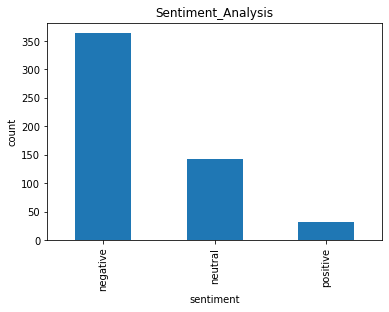

In [123]:
plt.title('Sentiment_Analysis')
plt.xlabel('sentiment')
plt.ylabel('count')
df_beg['sentiment classification'].value_counts().plot(kind = 'bar')

<AxesSubplot:title={'center':'Sentiment_Analysis'}, xlabel='sentiment', ylabel='count'>

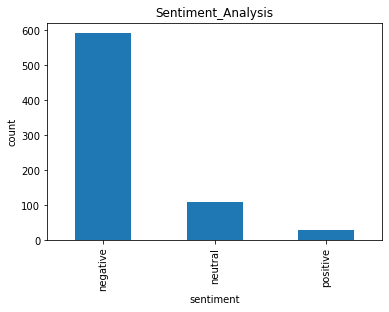

In [124]:
plt.title('Sentiment_Analysis')
plt.xlabel('sentiment')
plt.ylabel('count')
df_728['sentiment classification'].value_counts().plot(kind = 'bar')

<AxesSubplot:title={'center':'Sentiment_Analysis'}, xlabel='sentiment', ylabel='count'>

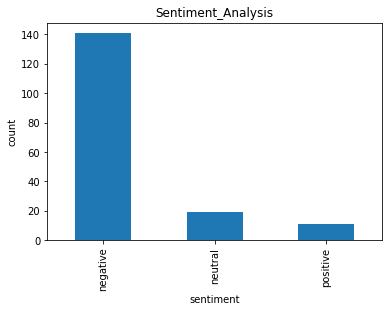

In [125]:
plt.title('Sentiment_Analysis')
plt.xlabel('sentiment')
plt.ylabel('count')
df_marzo2020['sentiment classification'].value_counts().plot(kind = 'bar')